 I conducted an in-depth EDA on a video game dataset to gain valuable insights into the data and facilitate data-driven decision-making. The key EDA tasks and visualizations performed are as follows:

Correlation Matrix: I created a heatmap of the correlation matrix to visualize the relationships between different features in the dataset. This helps identify potential patterns and dependencies among variables.

Pair Plots: I generated pair plots with kernel density estimation (KDE) to visualize the pairwise relationships between numerical variables. This aids in understanding the distributions and associations between features.

Distribution Plots: I created distribution plots (histograms) to examine the distribution of a specific numerical variable (e.g., 'Global_Sales'). This provides insights into the data's central tendencies and spread.

Box Plots: Box plots were used to visualize the spread and presence of outliers in numerical data. For instance, a box plot for 'Global_Sales' helps identify sales distribution characteristics.

Bar Charts: Bar charts were utilized to display the distribution of categorical data, such as the count of video game genres. This visualizes the frequency of each category.

Time Series Analysis: I conducted time series analysis to visualize the trend in global sales over the years. This helps in understanding how sales have evolved over time.

Genre, Platform, and Publisher Analysis: Bar charts were used to analyze the total global sales by genre, platform, and publisher. This reveals which genres, platforms, and publishers have the highest sales.

By performing these EDA tasks in Visual Studio Code, I gained valuable insights into the dataset, identified potential patterns and trends, and prepared the data for further analysis and modeling. This process lays the foundation for making data-driven decisions in the realm of video game sales and marketing.



In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer




In [24]:
Video_Game = pd.read_csv(r"C:\Users\Parth Tripathi\Downloads\Video_Game_Sales_dataset (1).csv")

In [25]:
Video_Game.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [26]:
video_games_df = pd.DataFrame(Video_Game)

In [27]:
video_games_df.isnull().sum()

Name                  0
Platform              0
Year_of_Release       8
Genre                 0
Publisher             1
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       9080
Critic_Count       9080
User_Score         9618
User_Count         9618
Rating             7164
dtype: int64

In [28]:
video_games_df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Rating'],
      dtype='object')

In [29]:
numerical_columns = ['Critic_Score','Critic_Count', 'User_Score', 'User_Count']

In [30]:
knn_imputer = KNNImputer(n_neighbors=5)
video_games_df[numerical_columns] = knn_imputer.fit_transform(video_games_df[numerical_columns])

In [31]:
video_games_categorical_columns = ['Publisher', 'Rating','Year_of_Release']

In [32]:
for i in video_games_categorical_columns:
    video_games_df[i].fillna(video_games_df[i].mode()[0], inplace=True)

In [33]:
video_games_df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Rating             0
dtype: int64

In [34]:
sports_video_games = video_games_df[video_games_df['Genre'] == 'Sports']
sports_video_games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.000000,51.000000,8.000000,324.00000,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.000000,73.000000,8.000000,193.00000,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.000000,63.000000,7.700000,146.00000,E
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.000000,33.000000,7.400000,52.00000,E
75,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.90,6.75,0.09,1.33,9.07,85.000000,41.000000,4.900000,442.00000,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17311,Top Spin 2,GBA,2006.0,Sports,Take-Two Interactive,0.00,0.00,0.00,0.00,0.01,68.912548,26.192059,7.117056,162.67248,E
17337,Kidz Sports: Ice Hockey,Wii,2008.0,Sports,Popcorn Arcade,0.00,0.00,0.00,0.00,0.01,68.912548,26.192059,7.117056,162.67248,E
17398,Fantastic Football Fan Party,Wii,2010.0,Sports,DTP Entertainment,0.00,0.00,0.00,0.00,0.01,68.912548,26.192059,7.117056,162.67248,E
17402,Virtua Tennis 2009,PC,2009.0,Sports,Sega,0.00,0.00,0.00,0.00,0.01,68.000000,8.000000,6.500000,19.00000,E


In [35]:
video_games_global_sales_gt_50 = video_games_df[video_games_df['Global_Sales'] > 50]
video_games_global_sales_gt_50

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E


In [36]:
video_games_df_sorted_by_name = video_games_df.sort_values(by='Name', ascending=False)
video_games_df_sorted_by_name.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
480,wwe Smackdown vs. Raw 2006,PS2,2005.0,Fighting,THQ,1.57,1.02,0.0,0.41,3.00,68.912548,26.192059,7.117056,162.67248,E
8285,uDraw Studio: Instant Artist,Wii,2011.0,Misc,THQ,0.06,0.09,0.0,0.02,0.17,68.912548,26.192059,7.117056,162.67248,E
15696,uDraw Studio: Instant Artist,X360,2011.0,Misc,THQ,0.01,0.01,0.0,0.00,0.02,54.000000,5.000000,5.700000,6.00000,E
645,uDraw Studio,Wii,2010.0,Misc,THQ,1.65,0.57,0.0,0.20,2.42,71.000000,9.000000,7.440000,39.20000,E
16593,thinkSMART: Chess for Kids,DS,2011.0,Misc,Mentor Interactive,0.01,0.00,0.0,0.00,0.01,68.912548,26.192059,7.117056,162.67248,E


In [37]:
video_games_global_sales_gt_50, video_games_df_sorted_by_name.head()


(         Name Platform  Year_of_Release   Genre Publisher  NA_Sales  EU_Sales  \
 0  Wii Sports      Wii           2006.0  Sports  Nintendo     41.36     28.96   
 
    JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
 0      3.77         8.45         82.54          76.0          51.0   
 
    User_Score  User_Count Rating  
 0         8.0       324.0      E  ,
                                Name Platform  Year_of_Release     Genre  \
 480      wwe Smackdown vs. Raw 2006      PS2           2005.0  Fighting   
 8285   uDraw Studio: Instant Artist      Wii           2011.0      Misc   
 15696  uDraw Studio: Instant Artist     X360           2011.0      Misc   
 645                    uDraw Studio      Wii           2010.0      Misc   
 16593    thinkSMART: Chess for Kids       DS           2011.0      Misc   
 
                 Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
 480                   THQ      1.57      1.02       0.0         0.41   
 8285        

In [38]:
most_made_genre = video_games_df['Genre'].mode()[0]
most_made_genre

'Action'

In [39]:
year_most_game_releases = video_games_df['Year_of_Release'].mode()[0]
year_most_game_releases 

2009.0

In [40]:
year_highest_sales = video_games_df.groupby('Year_of_Release')['Global_Sales'].sum().idxmax()
year_highest_sales

2008.0

In [41]:
most_made_genre, year_most_game_releases, year_highest_sales

('Action', 2009.0, 2008.0)

In [42]:
most_released_genre_single_year = video_games_df.groupby(['Year_of_Release', 'Genre']).size().idxmax()[1]

In [43]:
genre_highest_sale_price = video_games_df.groupby('Genre')['Global_Sales'].sum().idxmax()

In [44]:
most_released_genre_single_year, genre_highest_sale_price

('Action', 'Action')

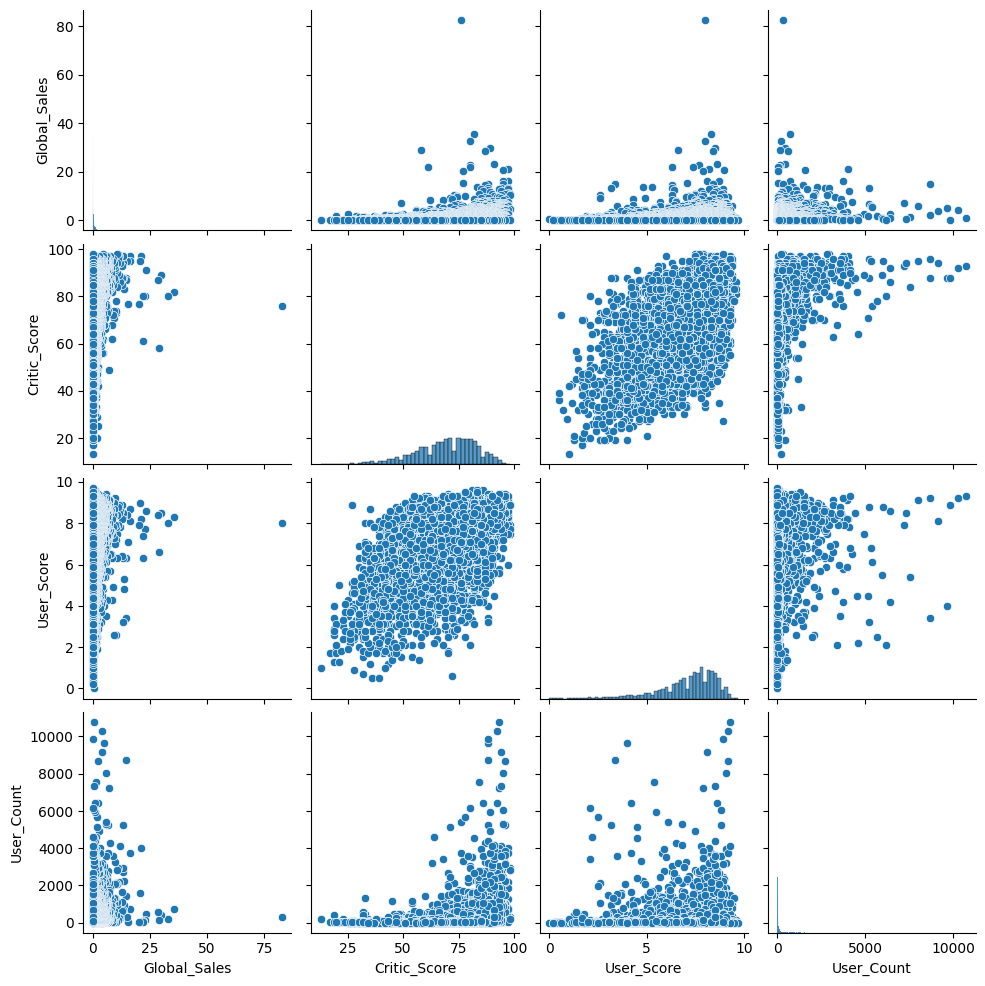

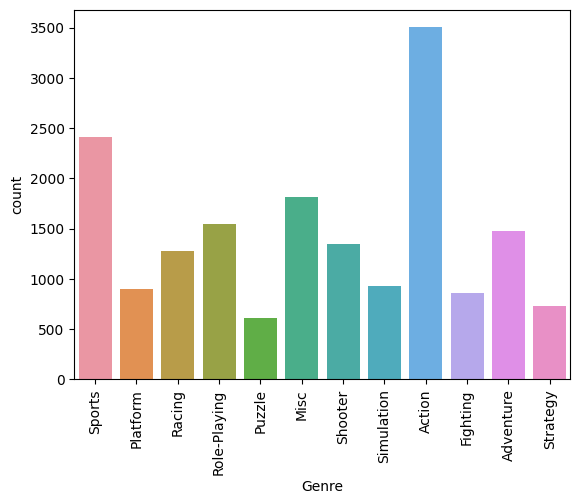

In [45]:
# Distribution of numeric features
sns.pairplot(Video_Game[['Global_Sales', 'Critic_Score', 'User_Score', 'User_Count']])
plt.show()

# Distribution of categorical features
sns.countplot(x='Genre', data=Video_Game)
plt.xticks(rotation=90)
plt.show()



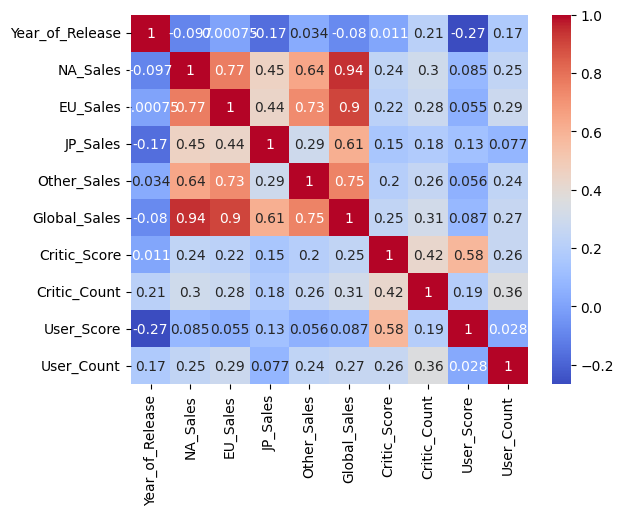

In [46]:
# Drop non-numeric columns before computing the correlation matrix
numeric_data = Video_Game.drop(['Name', 'Platform', 'Genre', 'Publisher', 'Rating'], axis=1)
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()



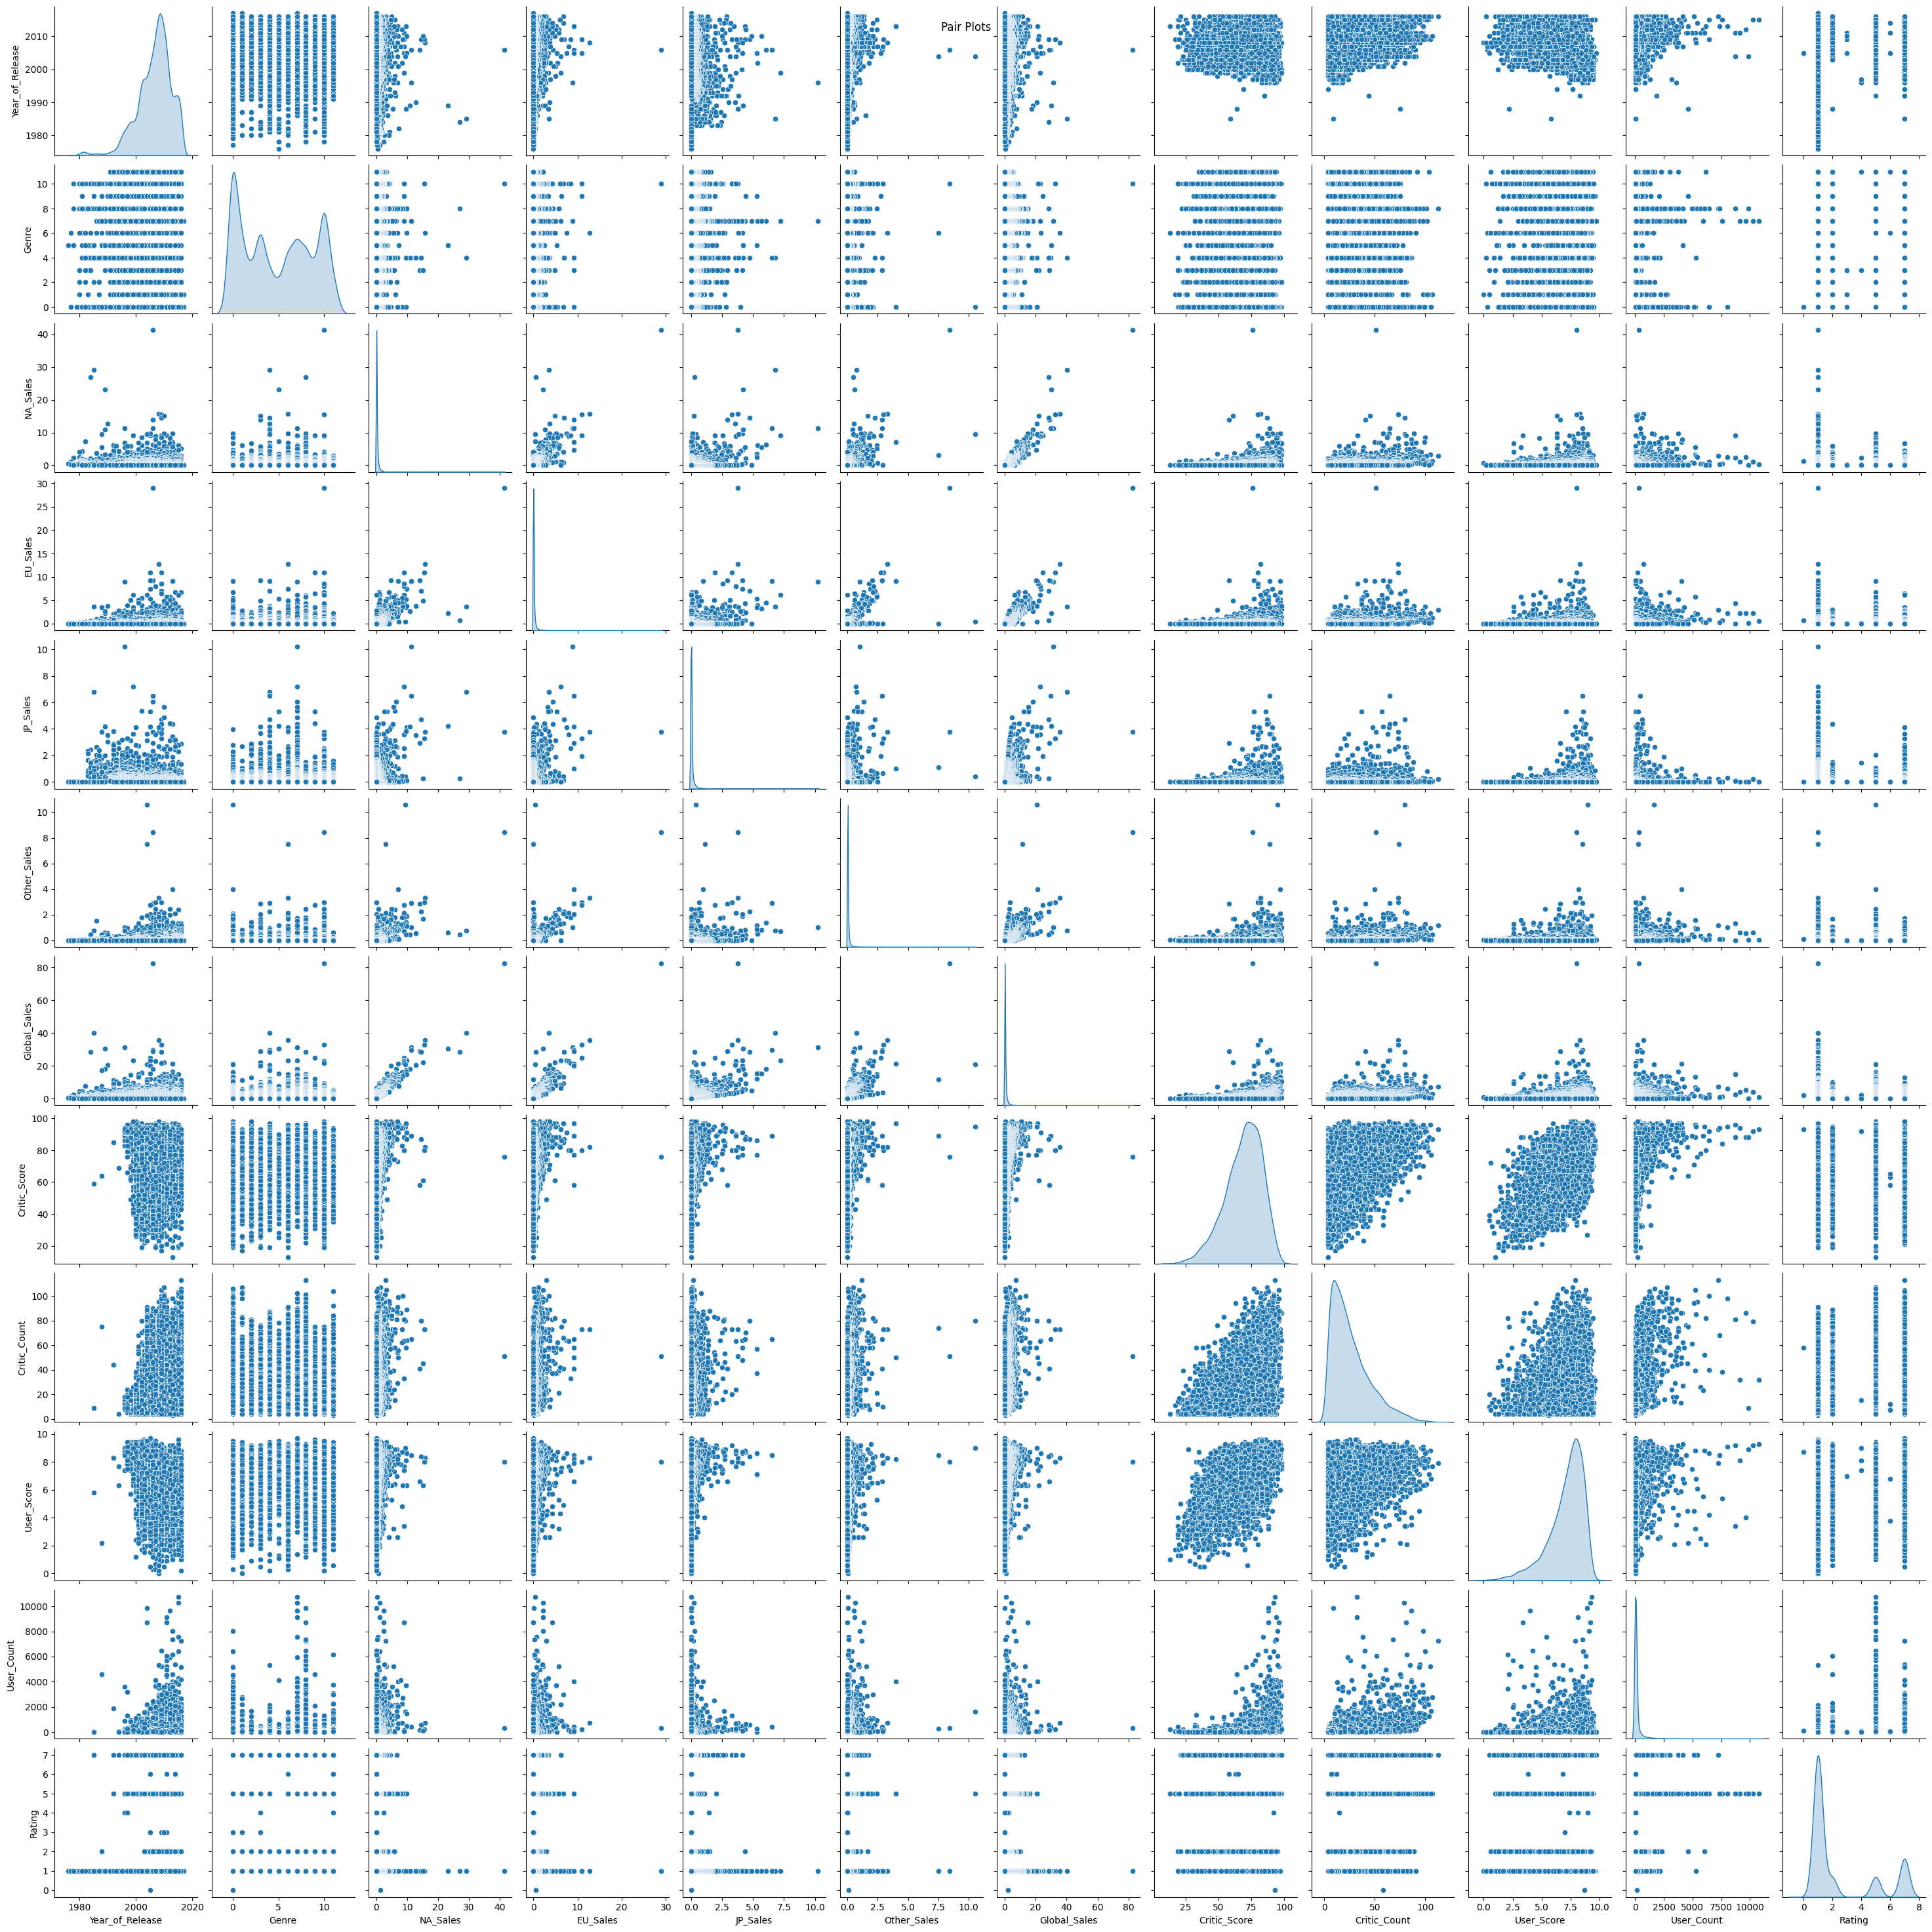

In [66]:
sns.pairplot(Video_Game, diag_kind='kde')
plt.suptitle('Pair Plots')
plt.show()

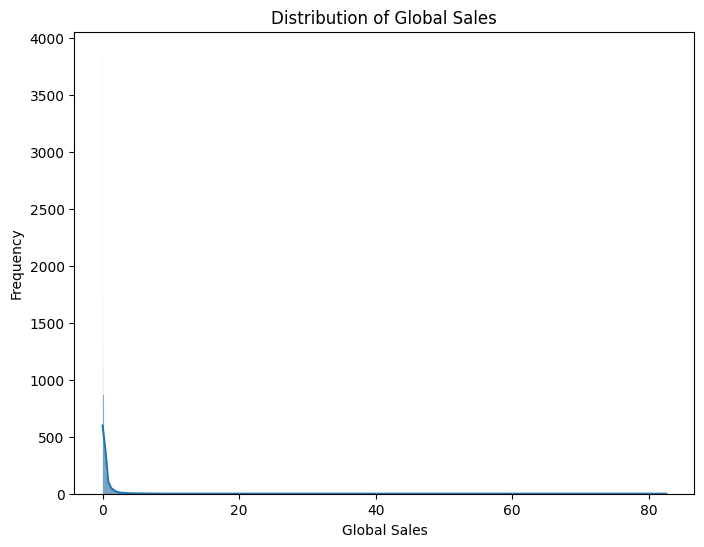

In [67]:
plt.figure(figsize=(8, 6))
sns.histplot(Video_Game['Global_Sales'], kde=True)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
plt.show()

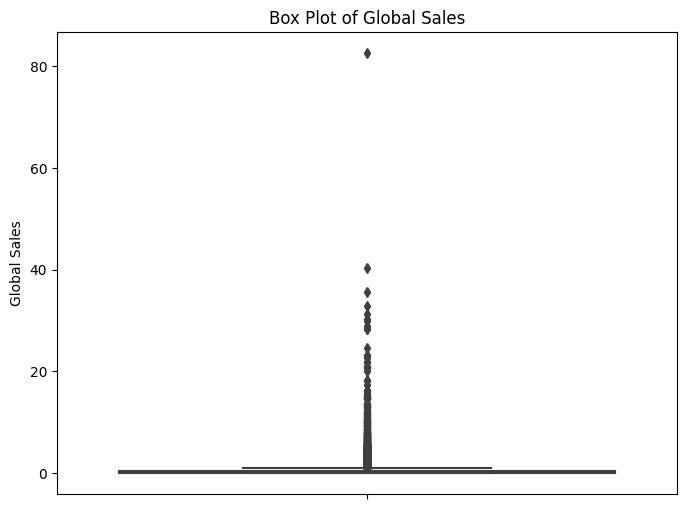

In [68]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=Video_Game, y='Global_Sales')
plt.title('Box Plot of Global Sales')
plt.ylabel('Global Sales')
plt.show()


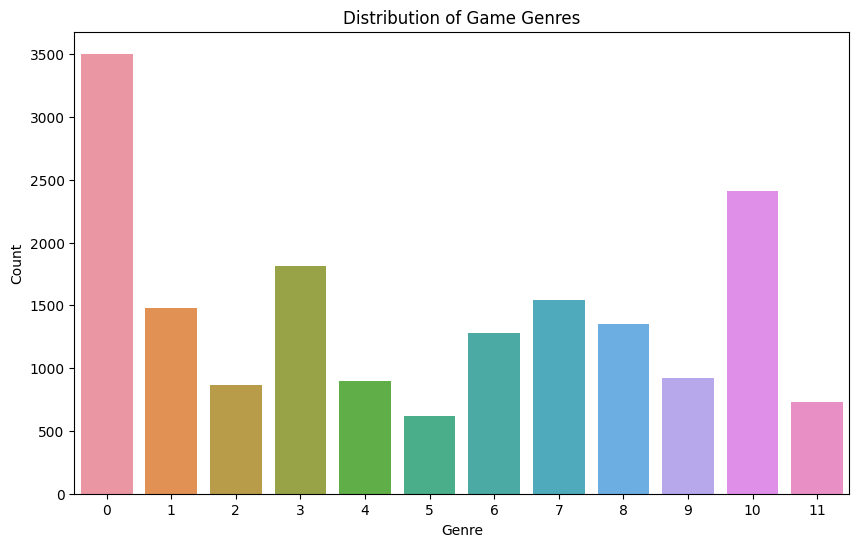

In [71]:
# Bar Charts (e.g., for 'Genre' column)
plt.figure(figsize=(10, 6))
sns.countplot(data=Video_Game, x='Genre')
plt.title('Distribution of Game Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.show()

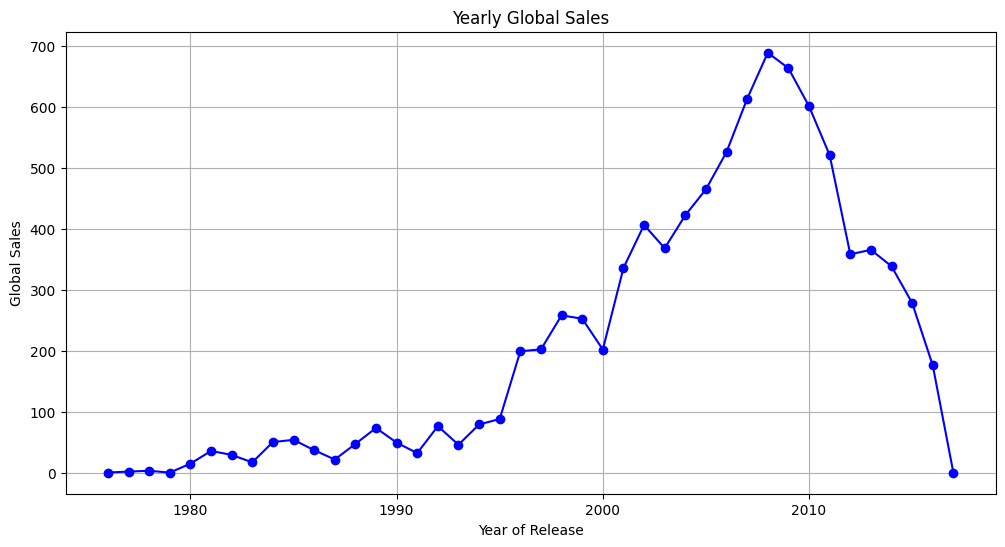

In [72]:
# Time Series Analysis (e.g., for 'Year_of_Release' and 'Global_Sales')
yearly_sales = Video_Game.groupby('Year_of_Release')['Global_Sales'].sum()
plt.figure(figsize=(12, 6))
yearly_sales.plot(marker='o', linestyle='-', color='b')
plt.title('Yearly Global Sales')
plt.xlabel('Year of Release')
plt.ylabel('Global Sales')
plt.grid(True)
plt.show()



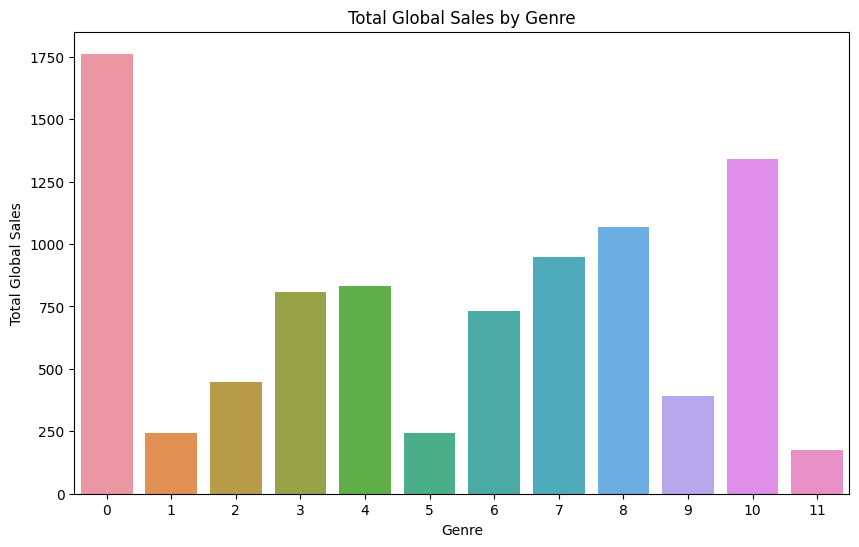

In [74]:
genre_sales = Video_Game.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Global Sales')
plt.xticks(rotation=360)
plt.show()

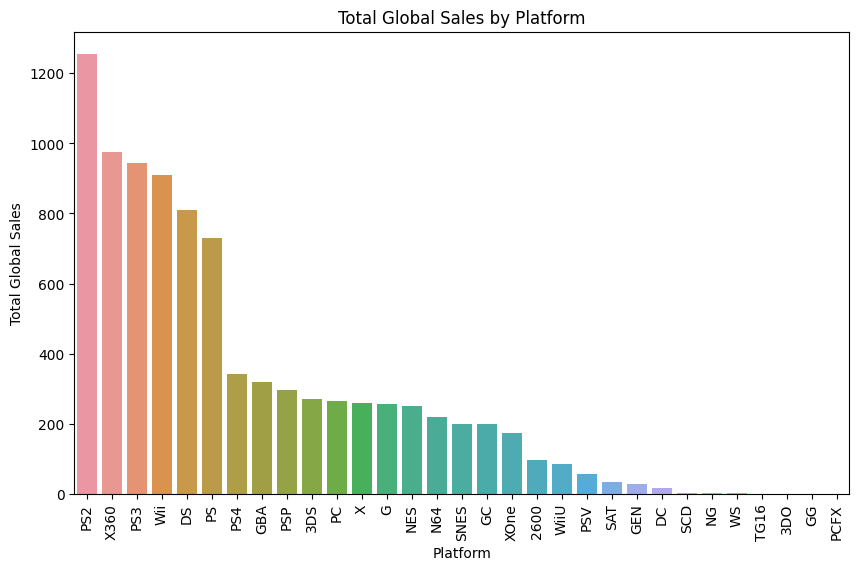

In [75]:
platform_sales = Video_Game.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_sales.index, y=platform_sales.values)
plt.title('Total Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Global Sales')
plt.xticks(rotation=90)
plt.show()

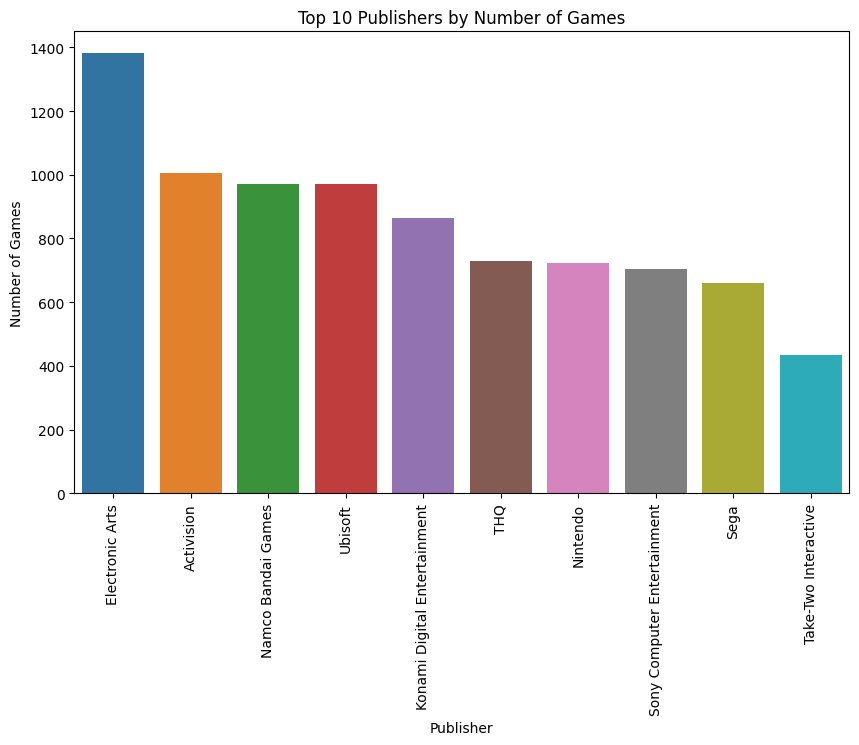

In [76]:
top_publishers = Video_Game['Publisher'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.title('Top 10 Publishers by Number of Games')
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.show()


In [47]:
# Label encoding for categorical columns (e.g., 'Genre', 'Rating')
label_encoder = LabelEncoder()
Video_Game['Genre'] = label_encoder.fit_transform(Video_Game['Genre'])
Video_Game['Rating'] = label_encoder.fit_transform(Video_Game['Rating'])


In [48]:
X = Video_Game[['Critic_Score', 'User_Score', 'Genre', 'Rating']]
y = Video_Game['Global_Sales']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with a strategy (e.g., mean, median, or most frequent)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train)

# Fit the model on the imputed training data
model.fit(X_train_imputed, y_train)

# Make predictions on the test data
X_test_imputed = imputer.transform(X_test)
y_pred = model.predict(X_test_imputed)



In [54]:
# Import the SimpleImputer class
from sklearn.impute import SimpleImputer

# Create a SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform the test data
X_train_clean_imputed = imputer.fit_transform(X_train_clean)
X_test_imputed = imputer.transform(X_test)

# Fit the model on the cleaned and imputed training data
model.fit(X_train_clean_imputed, y_train_clean)

# Make predictions on the imputed test data
y_pred = model.predict(X_test_imputed)




In [55]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# Initialize the model
model = HistGradientBoostingRegressor(random_state=42)

# Fit the model to the training data (no need to impute missing values)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


c:\Users\Parth Tripathi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [56]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# Initialize the model
model = HistGradientBoostingRegressor(random_state=42)

# Fit the model to the training data (no need to impute missing values)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [57]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.5095022316141501


In [58]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2.0529055784061345


In [59]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)


R-squared (R2) Score: 0.10118927068187211


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test)


In [61]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    # Add more hyperparameters to tune
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_clean)
best_model = grid_search.best_estimator_


In [62]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model, X_train_scaled, y_train_clean, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print("Cross-Validation RMSE Scores:", rmse_scores)


Cross-Validation RMSE Scores: [2.81420845 1.22529274 1.49356691 1.93524067 1.48413667]
